# Importing the libraries

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Getting and loading the Training and Testing set

In [2]:
path = r"C:\AI-DocHelper_Models_Code\Leukemia_Detection\dataset"

In [3]:
batch_size = 16
img_size = (134, 134)

In [4]:
image_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=40.,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2, 
                                  horizontal_flip=True,
                                  fill_mode="nearest",
                                  validation_split=0.2)

In [5]:
train_generator = image_datagen.flow_from_directory(path,
                                                   target_size=img_size,
                                                   batch_size=batch_size,
                                                   class_mode="binary",
                                                   subset="training",
                                                   shuffle=True)

validation_generator = image_datagen.flow_from_directory(path,
                                                        target_size=img_size,
                                                        batch_size=batch_size,
                                                        class_mode="binary",
                                                        subset="validation",
                                                        shuffle=False)

Found 8530 images belonging to 2 classes.
Found 2131 images belonging to 2 classes.


# Getting the class names

In [6]:
temp_classes = dict(train_generator.class_indices)

classes = dict()
for (k, v) in temp_classes.items():
    classes[v] = k
print(classes)

{0: 'all', 1: 'hem'}


# Building the CNN

## Initalising the CNN

In [7]:
model = Sequential()

## Adding VGG16 as the model base

In [8]:
from tensorflow.keras.applications import VGG16

In [9]:
vgg16 = VGG16(input_shape=(img_size[0], img_size[1], 3),
             include_top = False,
             weights="imagenet")

In [10]:
for layer in vgg16.layers:
    layer.trainable= False

In [11]:
model.add(vgg16)

In [12]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 134, 134, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 134, 134, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 134, 134, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 67, 67, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 67, 67, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 67, 67, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 33, 33, 128)       0     

## Flattening all the layers

In [13]:
model.add(Flatten())

## Adding the First Fully Connected Layer

In [14]:
model.add(Dense(units=64, activation="relu"))

## Adding the Second Fully Connected Layer

In [15]:
model.add(Dense(units=32, activation="relu"))

## Adding the Third Fully Connected Layer

In [16]:
model.add(Dense(units=16, activation="relu"))

## Adding a Dropout layer

In [17]:
model.add(Dropout(rate=0.5))

## Adding the Final Fully Connected Layer

In [18]:
model.add(Dense(units=1, activation="sigmoid"))

## Diaplaying the model summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

# Compiling the CNN

In [20]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])

# Training the CNN

## Saving the best model only

In [21]:
checkpoint = ModelCheckpoint(filepath="leukemia.h5",
                            save_best_only=True)

## Stop the training, if there is no improvement

In [22]:
earlyStopping = EarlyStopping(monitor="val_loss",
                             patience=10,
                             restore_best_weights=True,
                             verbose=1)

## Calculating the steps_per_epoch and valiadtion_steps

In [23]:
import math

batch_size=batch_size
training_size = 8530 
validation_size = 2131

compute_steps_per_epoch = lambda x : int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
valiadtion_steps = compute_steps_per_epoch(validation_size)

print(steps_per_epoch)
print(valiadtion_steps)

534
134


In [24]:
history = model.fit(train_generator,
                   steps_per_epoch=steps_per_epoch,
                    epochs=30,
                   validation_data=validation_generator,
                   validation_steps=valiadtion_steps,
                   callbacks=[checkpoint, earlyStopping])

Epoch 1/30
534/534 [==============================] - 500s 934ms/step - loss: 0.5765 - accuracy: 0.7103 - val_loss: 0.6039 - val_accuracy: 0.7147
Epoch 2/30
534/534 [==============================] - 471s 883ms/step - loss: 0.4829 - accuracy: 0.7899 - val_loss: 0.6193 - val_accuracy: 0.6987
Epoch 3/30
534/534 [==============================] - 474s 888ms/step - loss: 0.4743 - accuracy: 0.7911 - val_loss: 0.6237 - val_accuracy: 0.6856
Epoch 4/30
534/534 [==============================] - 472s 884ms/step - loss: 0.4818 - accuracy: 0.7960 - val_loss: 0.6260 - val_accuracy: 0.6893
Epoch 5/30
534/534 [==============================] - 474s 889ms/step - loss: 0.4743 - accuracy: 0.7925 - val_loss: 0.6645 - val_accuracy: 0.6856
Epoch 6/30
534/534 [==============================] - 475s 890ms/step - loss: 0.4785 - accuracy: 0.7956 - val_loss: 0.6494 - val_accuracy: 0.6987
Epoch 7/30
534/534 [==============================] - 475s 889ms/step - loss: 0.4575 - accuracy: 0.8096 - val_loss: 0.6789 -

# Saving the model

In [25]:
model_json = model.to_json()

with open("leukemia.json", "w") as json_file :
    json_file.write(model_json)

# Visualizing the training performance

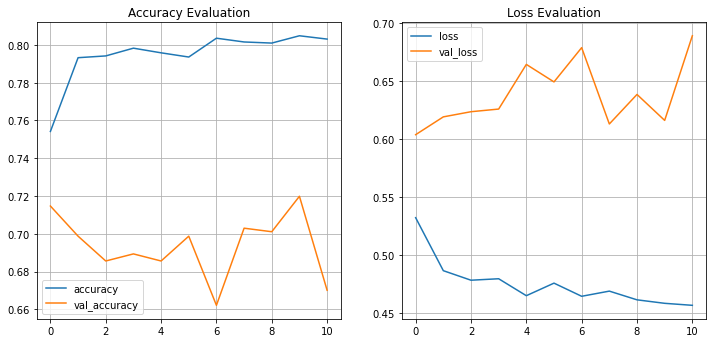

In [26]:
plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy Evaluation")

plt.subplot(2, 2, 2)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.grid()
plt.legend()
plt.title("Loss Evaluation")

plt.savefig("leukemia_model_history.jpg")

# Getting the accuracy for test set

In [27]:
test_accuracy = model.evaluate(validation_generator)
print(test_accuracy)

134/134 [==============================] - 94s 703ms/step - loss: 0.6095 - accuracy: 0.7025
[0.6094880700111389, 0.7024871110916138]


In [28]:
preds = model.predict(validation_generator, verbose=1)
preds

134/134 [==============================] - 95s 707ms/step


array([[0.08291611],
       [0.276836  ],
       [0.22335753],
       ...,
       [0.89642215],
       [0.10608965],
       [0.57503194]], dtype=float32)

In [29]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [30]:
print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]
